<a href="https://colab.research.google.com/github/rikharigaurav/FSDL-text-recognizer/blob/main/Deep_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pytorch is library used to simplify deep learning

it provides designed modules and classes to create nueral network, optimization, Datasets and Dataloaders



# what is torch.nn



to answer this question we will use MNIST datset .
this datset consists of black and white images of hand-written digits

In [ ]:
from pathlib import Path
import requests


def download_mnist(path):
    url = "https://github.com/pytorch/tutorials/raw/main/_static/"
    filename = "mnist.pkl.gz"

    if not (path / filename).exists():
        content = requests.get(url + filename).content
        (path / filename).open("wb").write(content)

    return path / filename


data_path = Path("data") if Path("data").exists() else Path("../data")
path = data_path / "downloaded" / "vector-mnist"
path.mkdir(parents=True, exist_ok=True)

datafile = download_mnist(path)

In [ ]:
import gzip
import pickle

def read_mnist(path):
  with gzip.open(path, "rb") as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")
  return x_train, y_train, x_valid, y_valid

x_train, y_trian, x_valid, y_valid = read_mnist(datafile)

Since each image is 28 X 28. so we need to flatten it so the number of rows = 784(28X28)

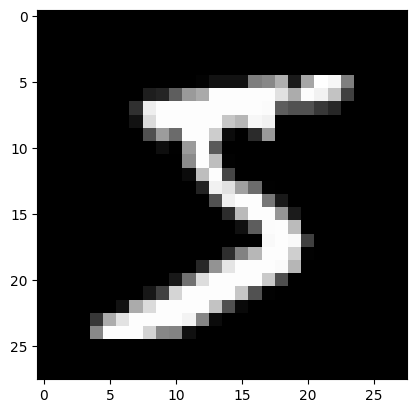

(50000, 784)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(x_train[0].reshape((28, 28)), cmap = "gray")

plt.show()
print(x_train.shape)

Neural net from scratch (without torch.nn)

**STEP 1:** we will initialize the weights and biases. Here we are using the Xavier initialization

**Xavier initialization:** multipying with (1/sqrt(n))

In [ ]:
import math
import torch

weights = torch.randn(784, 10) / math.sqrt(784)
weights.requires_grad_()
bias = torch.zeros(10, requires_grad=True)

**Step 2:** Create an activation function

Activation Function is used to prevent linearity in the prediction. otherwise the nodes will act as an linear function

In [ ]:
def log_softmax(x):
  return x - x.exp().sum(-1).log().unsqueeze(-1)

def model(xb):
  return log_softmax(xb @ weights + bias) # @ helps in matrix multiplication

Here we are doing FORWARD PASS (forward pass is nothing but just predicting the output).

**Note** Right now the prediction won't be better. They will we just random prediction due to random values of weights and bias.



but at

In [ ]:
batch_size = 32

xb = x_train[0:batch_size]  # This creates a mini-batch from the x_train
preds = model(torch.from_numpy(xb))    # Prediction

# torch.from_numpy help to convert numpy array to tensor to support matrix multiplication

preds[0], preds.shape
print(preds[0], preds.shape)


tensor([-2.1245, -2.3339, -2.2012, -1.8563, -2.4264, -2.7176, -2.6094, -2.6572,
        -1.8053, -2.9166], grad_fn=<SelectBackward0>) torch.Size([32, 10])


Let's implement -ve log-likelihood to use as the loss function

In [ ]:
def nll(input, target):
  return -input[range(target.shape[0]), target].mean()

loss_func = nll

# Setup


In [ ]:
lab_idx = 1

if "bootstrap" not in locals() or bootstrap.run:
    # path management for Python
    pythonpath, = !echo $PYTHONPATH
    if "." not in pythonpath.split(":"):
        pythonpath = ".:" + pythonpath
        %env PYTHONPATH={pythonpath}
        !echo $PYTHONPATH

    # get both Colab and local notebooks into the same state
    !wget --quiet https://fsdl.me/gist-bootstrap -O bootstrap.py
    import bootstrap

    # change into the lab directory
    bootstrap.change_to_lab_dir(lab_idx=lab_idx)

    # allow "hot-reloading" of modules
    %load_ext autoreload
    %autoreload 2
    # needed for inline plots in some contexts
    %matplotlib inline

    bootstrap.run = False  # change to True re-run setup

!pwd
%ls

env: PYTHONPATH=.:/env/python
.:/env/python
/content/fsdl-text-recognizer-2022-labs/lab01
notebooks/  text_recognizer/


# Getting data and making tensors

In [ ]:
from pathlib import Path
import requests


def download_mnist(path):
    url = "https://github.com/pytorch/tutorials/raw/main/_static/"
    filename = "mnist.pkl.gz"

    if not (path / filename).exists():
        content = requests.get(url + filename).content
        (path / filename).open("wb").write(content)

    return path / filename


data_path = Path("data") if Path("data").exists() else Path("../data")
path = data_path / "downloaded" / "vector-mnist"
path.mkdir(parents=True, exist_ok=True)

datafile = download_mnist(path)

The data used above is generally too large to be stored on a disk.

so fetching data over a network is a common first step in model training

The dataset above is too large which can require more resource to read, write and sending over the network - so the datasets is compressed (.gz extension)



In [ ]:
import gzip
import pickle

def read_mnist(path):
  with gzip.open(path, "rb") as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")
  return x_train, y_train, x_valid, y_valid

x_train, y_train, x_valid, y_valid = read_mnist(datafile)

torch.tensor helps us to convert our array into tensor

Tensor: Tensor in ML is just like an n-dimension array

In [ ]:
import torch

x_train, y_train, x_valid, y_valid = map(
    torch.tensor, (x_train, y_train, x_valid, y_valid)
)

In [ ]:
print(x_train, y_train, sep="\n")

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([5, 0, 4,  ..., 8, 4, 8])


Accessing the content of Tensor is called "indexing"

In [ ]:
y_train[0], x_train[0, ::2]

(tensor(5),
 tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0117, 0.0703, 0.4922, 0.6836, 0.6484,
         0.9648, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1172, 0.3672,
         0.6641, 0.9883, 0.9883, 0.8789, 0.9883, 0.7617, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.9297, 0.9883, 0.9883, 0.9883, 0.9883, 0.3633,
         0.3203,

In [ ]:
# .ndim provide the dimension of the following tensor

x_train.ndim, y_train.ndim

(2, 1)

In [ ]:
x_train[0, 0], y_train[0]

(tensor(0.), tensor(5))

In [ ]:
n, c = x_train.shape
print(x_train.shape)
print(y_train.shape)

torch.Size([50000, 784])
torch.Size([50000])


The Tensors inside of the x_train Tensor aren't just any old blocks of numbers: they're images of handwritten digits. The y_train Tensor contains the identities of those digits.

In [ ]:
# re-execute this cell for more samples
import random

import wandb  # just for some convenience methods that convert tensors to human-friendly datatypes

import text_recognizer.metadata.mnist as metadata # metadata module holds metadata separate from data

idx = random.randint(0, len(x_train))
example = x_train[idx]

print(y_train[idx])  # the label of the image
wandb.Image(example.reshape(*metadata.DIMS)).image  # the image itself

tensor(2)


# Building a DNN using only torch.Tensor methods and Python

## Defining the model


We'll make the simplest possible neural network: a single layer that performs matrix multiplication, and adds a vector of biases.

In [ ]:
import math
import torch

weights = torch.randn(784, 10) / math.sqrt(784)
weights.requires_grad_()
bias = torch.zeros(10, requires_grad=True)

In [ ]:
def linear(x: torch.Tensor) -> torch.Tensor:
    return x @ weights + bias

We need to normalize our model's outputs with a softmax to get our model to output something we can use as a probability distribution -- the probability that the network assigns to each label for the image.

For that, we'll need some torch math functions, like torch.sum and torch.exp.

We compute the logarithm of that softmax value in part for numerical stability reasons and in part because [it is more natural to work with the logarithms of probabilities.](https://www.youtube.com/watch?v=LBemXHm_Ops&t=1071s)



In [ ]:
def log_softmax(x: torch.Tensor) -> torch.Tensor:
    return x - torch.log(torch.sum(torch.exp(x), axis=1))[:, None]

def model(xb: torch.Tensor) -> torch.Tensor:
    return log_softmax(linear(xb))

In [ ]:
bs = 64  # batch size

xb = x_train[0:bs]  # a mini-batch of inputs
outs = model(xb)  # outputs on that batch

print(outs[0], outs.shape)  # outputs on the first element of the batch

tensor([-2.5260, -1.6185, -2.6774, -2.5753, -2.5511, -2.2622, -2.0818, -2.6549,
        -2.4585, -2.1692], grad_fn=<SelectBackward0>) torch.Size([64, 10])


## Defining the loss and metrics

Since we have set the weights randomly ofcourse we are going to get wrong prediction

We need to compare the output and the target variable to let our model know that how to update the values of weights
 but the model outputs a probability distribution, and the labels are just numbers.

We can take the label that had the highest probability (the index of the largest output for each input, aka the argmax over dimension 1) and treat that as the model's prediction for the digit in the image.


In [ ]:
def accuracy(out: torch.Tensor, yb: torch.Tensor) -> torch.Tensor:
  preds = torch.argmax(out, dim=1)
  return (preds == yb).float().mean()

In [ ]:
yb = y_train[0:bs]

acc = accuracy(outs, yb)

print(acc)

tensor(0.0781)


We can calculate how good our network is doing, so are we ready to use optimization to make it do better?

Not yet! To train neural networks, we use gradients (aka derivatives). So all of the functions we use need to be differentiable -- in particular they need to change smoothly so that a small change in input can only cause a small change in output.

Our argmax breaks that rule (if the values at index 0 and index N are really close together, a tiny change can change the output by N) so we can't use it.

If we try to run our backwards pass to get a gradient, we get a RuntimeError:

In [ ]:
try:
  acc.backward()
except RuntimeError as e:
  print(e)

element 0 of tensors does not require grad and does not have a grad_fn


In [ ]:
def cross_entropy(output: torch.Tensor, target: torch.Tensor) -> torch.Tensor:
  return -output[range(target.shape[0]), target].mean()

loss_func = cross_entropy

In [ ]:
print(loss_func(outs, yb), -torch.log(torch.tensor(1 / 10)))

tensor(2.3943, grad_fn=<NegBackward0>) tensor(2.3026)


In [ ]:
loss = loss_func(outs, yb)

loss.backward()

In [ ]:
bias.grad

tensor([ 0.0048, -0.0015,  0.0216, -0.0268, -0.0525,  0.0537, -0.0031,  0.0029,
         0.0089, -0.0081])

## Defining and running the fitting loop

We now have all the ingredients we need to fit a neural network to data:
- data (`x_train`, `y_train`)
- a network architecture with parameters (`model`, `weights`, and `bias`)
- a `loss_func`tion to optimize (`cross_entropy`) that supports `.backward` computation of gradients

We can put them together into a training loop
just using normal Python features,
like `for` loops, indexing, and function calls:

In [ ]:
lr = 0.5 #learning_rate
epochs = 2 # how many epochs to train for

for epoch in range(epochs):   # iterates over dataset for no. of epochs
  for i in range((n-1) // bs + 1):  # iterates over the dataset in batch size
    # determines the indexs of batch
    start_idx = i * bs
    end_idx = start_idx + bs

    # Creates batch from the large dataset
    xb = x_train[start_idx : end_idx]
    yb = y_train[start_idx : end_idx]

    # runs the model on mini batch to generate prediction
    pred = model(xb)

    # calculates the loss between actual target and prediction
    loss = loss_func(pred, yb)

    #calculate the gradients with a backward pass
    loss.backward()

    # updates the parameters
    with torch.no_grad():  # we don't want to track gradients through this part!
      # SGD learning rule: update with negative gradient scaled by lr
      weights -= weights.grad * lr
      bias -= bias.grad * lr

      '''NOTE: PyTorch doesn't assume you're done with gradients
          until you say so -- by explicitly "deleting" them,
          i.e. setting the gradients to 0
      '''
      weights.grad.zero_()
      bias.grad.zero_()


To check the function is working we will confirm if the values of  `loss_func` and `accuracy` has gone down.

In [ ]:
print(loss_func(model(xb), yb), accuracy(model(xb), yb))

tensor(0.0817, grad_fn=<NegBackward0>) tensor(1.)


# Refactoring with core `torch.nn` components



For the next few sections,
we'll progressively refactor this code to
make it shorter, cleaner,
and more extensible
using tools from the sublibraries of PyTorch:
`torch.nn`, `torch.optim`, and `torch.utils.data`.


## Using torch.nn.functional for stateless computation

First, let's drop that `cross_entropy` and `log_softmax`

In [ ]:
import torch.nn.functional as F

loss_func = F.cross_entropy

def model(xb):
  return xb @ weights + bias

In [ ]:
print(loss_func(model(xb), yb), accuracy(model(xb), yb))  # should be unchanged

tensor(0.0817, grad_fn=<NllLossBackward0>) tensor(1.)


## Using torch.nn.Module to define functions whose state is given by torch.nn.Parameters

Challenge:- Handling State in Nueral Network. In DNN the tension arises from the desire to treat neural network as functions during inference, where inputs are transformed into outputs, while they are inherently stateful due to the need for parameter optimization during training.

We want to use them as a functions

PyTorch's solution to this is the `nn.Module` class:
a Python class that is callable like a function
but tracks state like an object.

  `nn.Parameter` is a wrapper around a Tensor that tells PyTorch that it should be considered a parameter of the model and will be optimized during training.

In [ ]:
from torch import nn

class MNISTLogistic(nn.Module):
  def __init__(self):
    super().__init__()    # calls the parent class
    self.weights = nn.Parameter(torch.randn(784, 10) / math.sqrt(784))
    self.bias = nn.Parameter(torch.zeros(10))

We've separated the definition of the `.forward` method
from the definition of the class above and
attached the method to the class manually below.
We only do this to make the construction of the class
easier to read and understand in the context this notebook --
a neat little trick we'll use a lot in these labs.
Normally, we'd just define the `nn.Module` all at once.

In [ ]:
def forward(self, xb: torch.Tensor) -> torch.Tensor:
  return xb @ self.weights + self.bias

MNISTLogistic.forward = forward

model = MNISTLogistic()
print(model(xb)[:4])
loss = loss_func(model(xb), yb)
loss.backward()
print(model.weights.grad[::17, ::2])

tensor([[-0.1814,  0.4743,  0.5328, -0.7511,  0.0783, -0.3947,  0.0400,  0.0079,
          0.0937, -0.1772],
        [ 0.1161, -0.2883,  0.2825, -0.7603, -0.0962, -0.2342, -0.3907, -0.9952,
          0.6202,  0.3406],
        [ 0.0287, -0.1160,  0.2322, -0.5794, -0.1520, -0.4033,  0.3408, -0.0086,
          0.2562,  0.0151],
        [ 0.1083, -0.0685, -0.1527, -0.5589,  0.0661, -0.0590, -0.5007, -0.4315,
          0.1728,  0.2218]], grad_fn=<SliceBackward0>)
tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 6.4194e-03,  8.4073e-03,  7.9137e-03,  3.8801e-03,  1.9468e-02],
        [ 0.

But how do we apply our updates?
Do we need to access `model.weights.grad` and `model.weights`,
like we did in our first implementation?

Luckily, we don't!
We can iterate over all of our model's `torch.nn.Parameters`
via the `.parameters` method:

In [ ]:
print(*list(model.parameters()), sep="\n")

Parameter containing:
tensor([[ 0.0760, -0.0061,  0.0557,  ...,  0.0302, -0.0037, -0.0131],
        [-0.0625,  0.0331, -0.0042,  ..., -0.0162,  0.0048, -0.0103],
        [-0.0054,  0.0034, -0.0082,  ..., -0.0061,  0.0252, -0.0331],
        ...,
        [-0.0534, -0.0116,  0.0083,  ..., -0.0132,  0.0024,  0.0068],
        [-0.0492, -0.0078, -0.0024,  ..., -0.0801, -0.0153,  0.0017],
        [-0.0172,  0.0006, -0.0036,  ...,  0.0182, -0.0895,  0.0169]],
       requires_grad=True)
Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)


That means we no longer need to assume we know the names
of the model's parameters when we do our update --
we can reuse the same loop with different models.

Let's wrap up into single function to `fit` our model

In [ ]:
def fit():
  for epoch in range(epochs):
    for i in range((n - 1) // bs + 1):
      start_idx = i * bs
      end_idx = start_idx + bs
      xb = x_train[start_idx : end_idx]
      yb = y_train[start_idx : end_idx]
      pred = model(xb)
      loss = loss_func(pred, yb)

      loss.backward()

      with torch.no_grad():
        for p in model.parameters():
          p -= p.grad * lr
        model.zero_grad()

fit()

In [ ]:
print(accuracy(model(xb), yb))

tensor(1.)


#Refactoring intermediate `torch.nn` components: network layers, optimizers, and data handling

## Using `torch.nn.Linear` for the model definition

These `nn.Module`s are reusable --
say, if we want to make a network with multiple layers of the same type --
and there are lots of them already defined:

In [ ]:
import textwrap

print("torch.nn.Modules", *textwrap.wrap(", ".join(torch.nn.modules.__all__)), sep="\n\t")

torch.nn.Modules
	Module, Identity, Linear, Conv1d, Conv2d, Conv3d, ConvTranspose1d,
	ConvTranspose2d, ConvTranspose3d, Threshold, ReLU, Hardtanh, ReLU6,
	Sigmoid, Tanh, Softmax, Softmax2d, LogSoftmax, ELU, SELU, CELU, GLU,
	GELU, Hardshrink, LeakyReLU, LogSigmoid, Softplus, Softshrink,
	MultiheadAttention, PReLU, Softsign, Softmin, Tanhshrink, RReLU,
	L1Loss, NLLLoss, KLDivLoss, MSELoss, BCELoss, BCEWithLogitsLoss,
	NLLLoss2d, PoissonNLLLoss, CosineEmbeddingLoss, CTCLoss,
	HingeEmbeddingLoss, MarginRankingLoss, MultiLabelMarginLoss,
	MultiLabelSoftMarginLoss, MultiMarginLoss, SmoothL1Loss,
	GaussianNLLLoss, HuberLoss, SoftMarginLoss, CrossEntropyLoss,
	Container, Sequential, ModuleList, ModuleDict, ParameterList,
	ParameterDict, AvgPool1d, AvgPool2d, AvgPool3d, MaxPool1d, MaxPool2d,
	MaxPool3d, MaxUnpool1d, MaxUnpool2d, MaxUnpool3d, FractionalMaxPool2d,
	FractionalMaxPool3d, LPPool1d, LPPool2d, LocalResponseNorm,
	BatchNorm1d, BatchNorm2d, BatchNorm3d, InstanceNorm1d, InstanceNorm2d,


In [ ]:
class MNISTLogistic(nn.Module):
  def __init__(self):
    super().__init__()
    self.lin = nn.Linear(784, 10)  #pytorch finds the nn.Parameter inside this nn.Module

  def forward(self, xb):
    return self.lin(xb)   # this function call nn.Linear.forward here

In [ ]:
model = MNISTLogistic()
print(loss_func(model(xb), yb))

tensor(2.2364, grad_fn=<NllLossBackward0>)


We can see that the `nn.Linear` module is a "child"
of the `model`,
and we don't see the matrix of weights and the bias vector:

In [ ]:
print(*list(model.children()))

Linear(in_features=784, out_features=10, bias=True)


In [ ]:
print(*list(model.parameters()), sep="\n")

Parameter containing:
tensor([[ 0.0014, -0.0110, -0.0120,  ...,  0.0349,  0.0247,  0.0050],
        [-0.0119, -0.0009,  0.0224,  ..., -0.0280, -0.0246,  0.0062],
        [ 0.0115, -0.0185, -0.0148,  ..., -0.0155, -0.0331, -0.0249],
        ...,
        [ 0.0123, -0.0104,  0.0240,  ...,  0.0109,  0.0271, -0.0336],
        [-0.0208,  0.0057, -0.0266,  ..., -0.0187,  0.0040,  0.0301],
        [-0.0121, -0.0330, -0.0346,  ..., -0.0031, -0.0266, -0.0256]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0214,  0.0312, -0.0310,  0.0046,  0.0224, -0.0105, -0.0113,  0.0305,
         0.0164,  0.0316], requires_grad=True)


##Applying gradient with torch.optim.Optimizer

So why are we doing that by hand?
Now that our model is a `torch.nn.Module` using `torch.nn.Parameters`,
we don't have to --
we just need to point a `torch.optim.Optimizer`
at the parameters of our model.

While we're at it, we can also use a more sophisticated optimizer --
`Adam` is a common first choice.

In [ ]:
from torch import optim

def config_optimizer(model: nn.Module) -> optim.Optimizer:
  return optim.Adam(model.parameters(), lr=3e-4)

In [ ]:
model = MNISTLogistic()
opt = config_optimizer(model)

print("before training:", loss_func(model(xb), yb), sep="\n\t")

for epoch in range(epochs):
  for i in range((n - 1) // bs + 1):
    start_idx = i * bs
    end_idx = start_idx + bs

    xb = x_train[start_idx : end_idx]
    yb = y_train[start_idx : end_idx]

    pred = model(xb)
    loss = loss_func(pred, yb)

    loss.backward()
    opt.step()
    opt.zero_grad()

print("after training: ", loss_func(model(xb), yb), sep="\n\t")


before training:
	tensor(2.2764, grad_fn=<NllLossBackward0>)
after training: 
	tensor(0.8428, grad_fn=<NllLossBackward0>)


##Organizing data with torch.utils.data.Dataset

We're also manually handling the data.
First, we're independently and manually aligning
the inputs, `x_train`, and the outputs, `y_train`.

Aligned data is important in ML.
We want a way to combine multiple data sources together
and index into them simultaneously.

That's done with `torch.utils.data.Dataset`.
Just inherit from it and implement two methods to support indexing:
`__getitem__` and `__len__`.

In [ ]:
from text_recognizer.data.util import BaseDataset

train_ds = BaseDataset(x_train, y_train)

The cell below will pull up the documentation for this class,
which effectively just indexes into the two `Tensor`s simultaneously.

It can also apply transformations to the inputs and targets.
We'll see that later.

In [ ]:
BaseDataset??

In [ ]:
model = MNISTLogistic()
opt = config_optimizer(model)

for epoch in range(epochs):
  for i in range((n - 1) // bs + 1):
    xb, yb = train_ds[ i * bs : i * bs + bs]
    pred = model(xb)
    loss = loss_func(pred, yb)

    loss.backward()
    opt.step()
    opt.zero_grad()

print(loss_func(model(xb), yb))

tensor(0.8493, grad_fn=<NllLossBackward0>)


##Batching up data with torch.utils.data.DataLoader

We're also still manually building our batches.

Making batches out of datasets is a core component of contemporary deep learning training workflows,
so unsurprisingly PyTorch offers a tool for it: the `DataLoader`.

We just need to hand our `Dataset` to the `DataLoader`
and choose a `batch_size`.

We can tune that parameter and other `DataLoader` arguments,
like `num_workers` and `pin_memory`,
to improve the performance of our training loop.
For more on the impact of `DataLoader` parameters on the behavior of PyTorch code, see
[this blog post and Colab](https://wandb.ai/wandb/trace/reports/A-Public-Dissection-of-a-PyTorch-Training-Step--Vmlldzo5MDE3NjU).

In [ ]:
from torch.utils.data import DataLoader

train_ds = BaseDataset(x_train, y_train)
train_dataloader = DataLoader(train_ds,  batch_size = bs)

In [ ]:
def fit(self: nn.Module, train_dataloader: DataLoader):
  opt = config_optimizer(self)

  for epoch in range(epochs):
    for xb, yb in train_dataloader:
      pred = self(xb)
      loss = loss_func(pred, yb)

      loss.backward()
      opt.step()
      opt.zero_grad()

MNISTLogistic.fit = fit

In [ ]:
model = MNISTLogistic()

model.fit(train_dataloader)

print(loss_func(model(xb), yb))

tensor(0.8514, grad_fn=<NllLossBackward0>)


Compare this training loop with our first training loop - much cleaner and much more powerfull!

##Swapping in another model

To see that our new `.fit` is more powerful,
let's use it with a different model.

Specifically, let's draw in the `MLP`,
or "multi-layer perceptron" model
from the `text_recognizer` library
in our codebase.

In [ ]:
from text_recognizer.models.mlp import MLP


MLP.fit = fit  # attach our fitting loop

If you look in the `.forward` method of the `MLP`,
you'll see that it uses
some modules and functions we haven't seen, like
[`nn.Dropout`](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html)
and [`F.relu`](https://pytorch.org/docs/stable/generated/torch.nn.functional.relu.html),
but otherwise fits the interface of our training loop:
the `MLP` is callable and it takes an `x` and returns a guess for the `y` labels.

In [ ]:
MLP.forward??

If we look at the constructor, `__init__`,
we see that the `nn.Module`s (`fc` and `dropout`)
are initialized and attached as attributes.

In [ ]:
MLP.__init__??

We also see that we are required to provide a `data_config`
dictionary and can optionally configure the module with `args`.

For now, we'll only do the bare minimum and specify
the contents of the `data_config`:
the `input_dims` for `x` and the `mapping`
from class index in `y` to class label,
which we can see are used in the `__init__` method.

In [ ]:
digits_to_9 = list(range(10))
data_config = {"input_dims": (784,), "mapping": {digit: str(digit) for digit in digits_to_9}}
data_config

{'input_dims': (784,),
 'mapping': {0: '0',
  1: '1',
  2: '2',
  3: '3',
  4: '4',
  5: '5',
  6: '6',
  7: '7',
  8: '8',
  9: '9'}}

In [ ]:
model = MLP(data_config)
model

MLP(
  (fc1): Linear(in_features=784, out_features=1024, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=1024, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)

The resulting MLP is a bit larger than our `MNISTLogistic` model

In [ ]:
model.fc1.weight

Parameter containing:
tensor([[ 0.0257,  0.0249, -0.0169,  ..., -0.0328, -0.0028,  0.0175],
        [ 0.0260,  0.0340,  0.0077,  ..., -0.0027,  0.0318,  0.0259],
        [ 0.0172,  0.0141,  0.0296,  ..., -0.0024,  0.0300, -0.0299],
        ...,
        [ 0.0175, -0.0103, -0.0040,  ..., -0.0267, -0.0071, -0.0253],
        [ 0.0336, -0.0206, -0.0186,  ..., -0.0202,  0.0266,  0.0072],
        [ 0.0292, -0.0210, -0.0047,  ..., -0.0103, -0.0023, -0.0349]],
       requires_grad=True)

But that doesn't matter for our fitting loop, which happily optimizes this model on batches from the `train_dataloader`, though it takes a bit longer.

In [ ]:
%%time

print("before training:", loss_func(model(xb), yb))

train_ds = BaseDataset(x_train, y_train)
train_dataloader = DataLoader(train_ds, batch_size = bs)
fit(model, train_dataloader)

print("after training:", loss_func(model(xb), yb))

before training: tensor(2.3120, grad_fn=<NllLossBackward0>)
after training: tensor(0.2826, grad_fn=<NllLossBackward0>)
CPU times: user 21.6 s, sys: 114 ms, total: 21.7 s
Wall time: 27.4 s


#Extra goodies: data organization, validation, and acceleration

Before we've got a DNN fitting loop that's welcome in polite company,
we need three more features:
organized data loading code, validation, and GPU acceleration.

##Making the GPU go brrr

Luckily, really excellent chips
for accelerating deep learning are readily available
as a consumer product:
graphics processing units (GPUs),
which are designed to perform large matrix multiplications in parallel.
Their name derives from their origins
applying large matrix multiplications to manipulate shapes and textures
in for graphics engines for video games and CGI.

If your system has a GPU and the right libraries installed
for `torch` compatibility,
the cell below will print information about its state.

In [ ]:
if torch.cuda.is_available():
  !nvidia-smi
else:
  print("cuda not available")

Sat Feb 10 07:37:24 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

model.to(device)

loss_func(model(xb.to(device)), yb.to(device))

tensor(0.3755, device='cuda:0', grad_fn=<NllLossBackward0>)

Specifically,
we can provide a `transform` that is called on the inputs
and a `target_transform` that is called on the labels
before they are returned.
In the FSDL codebase,
this feature is used for data preparation, like
reshaping, resizing,
and normalization.

We'll use this as an opportunity to put the `Tensor`s on the appropriate device.

In [ ]:
def push_to_device(tensor):
  return tensor.to(device)

train_ds = BaseDataset(x_train, y_train, transform = push_to_device, target_transform = push_to_device)
train_dataloader = DataLoader(train_ds, batch_size = bs)

In [ ]:
%%time

model = MLP(data_config)
model.to(device)

model.fit(train_dataloader)

print(loss_func(model(push_to_device(xb)), push_to_device(yb)))

tensor(0.4129, device='cuda:0', grad_fn=<NllLossBackward0>)
CPU times: user 6.87 s, sys: 122 ms, total: 6.99 s
Wall time: 7.25 s


##Adding validation data and organizing data code with a `DataModule`

In [ ]:
class MNISTModule:
  url = "https://github.com/pytorch/tutorials/raw/master/_static/"
  filename = "mnist.pkl.gz"

  def __init__(self, dir, bs=32):
    self.dir = dir
    self.bs = bs
    self.path = self.dir/self.filename

  def prepare_data(self):
    if not(self.path).exists():
      content = request.get(self.url + self.filename).content
      self.path.open("wb").write(content)

  def setup(self):
    with gzip.open(self.path, "rb") as f:
      ((X_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

    X_train, y_train, x_valid, y_valid = map(
        torch.tensor, (X_train, y_train, x_valid, y_valid)
    )

    self.train_ds = BaseDataset(X_train, y_train, transform = push_to_device, target_transform = push_to_device)
    self.valid_ds = BaseDataset(x_valid, y_valid, transform = push_to_device, target_transform = push_to_device)

  def train_dataloader(self):
    return torch.utils.data.DataLoader(self.train_ds, batch_size=self.bs, shuffle=True)

  def valid_dataloader(self):
    return torch.utils.data.DataLoader(self.valid_ds, batch_size=self.bs, shuffle=True)



In [ ]:
def fit(self: nn.Module, datamodule):
    datamodule.prepare_data()
    datamodule.setup()

    valid_dataloader = datamodule.valid_dataloader()

    self.eval()
    with torch.no_grad():
        valid_loss = sum(loss_func(self(xb), yb) for xb, yb in valid_dataloader)

    print("before start of training:", valid_loss / len(valid_dataloader))

    opt = configure_optimizer(self)
    train_dataloader = datamodule.train_dataloader()
    for epoch in range(epochs):
        self.train()
        for xb, yb in train_dataloader:
            pred = self(xb)
            loss = loss_func(pred, yb)

            loss.backward()
            opt.step()
            opt.zero_grad()

        self.eval()
        with torch.no_grad():
            valid_loss = sum(loss_func(self(xb), yb) for xb, yb in valid_dataloader)

        print(epoch, valid_loss / len(valid_dataloader))


MNISTLogistic.fit = fit
MLP.fit = fit